In [1]:
import kchannel

In [2]:
coor = "/home/tom/projects/markov/kchannel/testcase/MthK/start.gro"
trajs = ["/home/tom/projects/markov/kchannel/testcase/MthK/0/trajout.xtc",
         "/home/tom/projects/markov/kchannel/testcase/MthK/1/trajout.xtc",
         "/home/tom/projects/markov/kchannel/testcase/MthK/2/trajout.xtc"
        ]

In [3]:
_ = kchannel.detectSF(coor)

idx	layer	chain	resid	resname	name
756	4	0	59	THR	OG1
2209	4	1	59	THR	OG1
3662	4	2	59	THR	OG1
5115	4	3	59	THR	OG1
759	3	0	59	THR	O
2212	3	1	59	THR	O
3665	3	2	59	THR	O
5118	3	3	59	THR	O
779	2	0	60	VAL	O
2232	2	1	60	VAL	O
3685	2	2	60	VAL	O
5138	2	3	60	VAL	O
786	1	0	61	GLY	O
2239	1	1	61	GLY	O
3692	1	2	61	GLY	O
5145	1	3	61	GLY	O
807	0	0	62	TYR	O
2260	0	1	62	TYR	O
3713	0	2	62	TYR	O
5166	0	3	62	TYR	O


In [ ]:
for traj in trajs:
    kchannel.run(coor, traj, CADistance=True, ignoreS0ScavJump=True)

In [4]:
# location of the directories containing the trajectories
locations = ["/home/tom/projects/markov/kchannel/testcase/MthK/0",
             "/home/tom/projects/markov/kchannel/testcase/MthK/1",
             "/home/tom/projects/markov/kchannel/testcase/MthK/2",
            ]
channel = kchannel.loadResults(locations)
stats_df, states_df = kchannel.computeStats(channel, save='./stats.csv')
stats_df

Current (pA): 13.884	12.816 - 14.952

Stats saved to /hdd/projects/markov/kchannel/stats.csv


,T (ns),dt (ns),current (pA),WKK0KW,C0KK0C,WK0KKW,WKK0KC,C0KKWC,CK0KKW,C0K0KW,...,CK0K0C,0KK0KW,CKK0KC,K0KK0C,K0KKWC,WKK0KK,K0K0KW,KK0KKW,WKK0K0,CK0KWW
0,50.0,0.02,12.816,0.375850,0.229508,0.103159,0.087965,0.044782,0.020792,0.064774,...,0.001200,0.0012,0.000000,0.0000,0.0000,0.0000,0.0004,0.0000,0.0000,0.0000
1,50.0,0.02,16.020,0.320272,0.311475,0.083167,0.044782,0.057577,0.091563,0.020392,...,0.001599,0.0004,0.001599,0.0004,0.0008,0.0004,0.0000,0.0004,0.0004,0.0004
2,50.0,0.02,12.816,0.504998,0.110756,0.105158,0.077569,0.056777,0.030388,0.049180,...,0.000000,0.0012,0.000800,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Total permeation events: 4
Identified cycles: 3
Total permeation events: 5
Identified cycles: 4
Total permeation events: 4
Identified cycles: 3


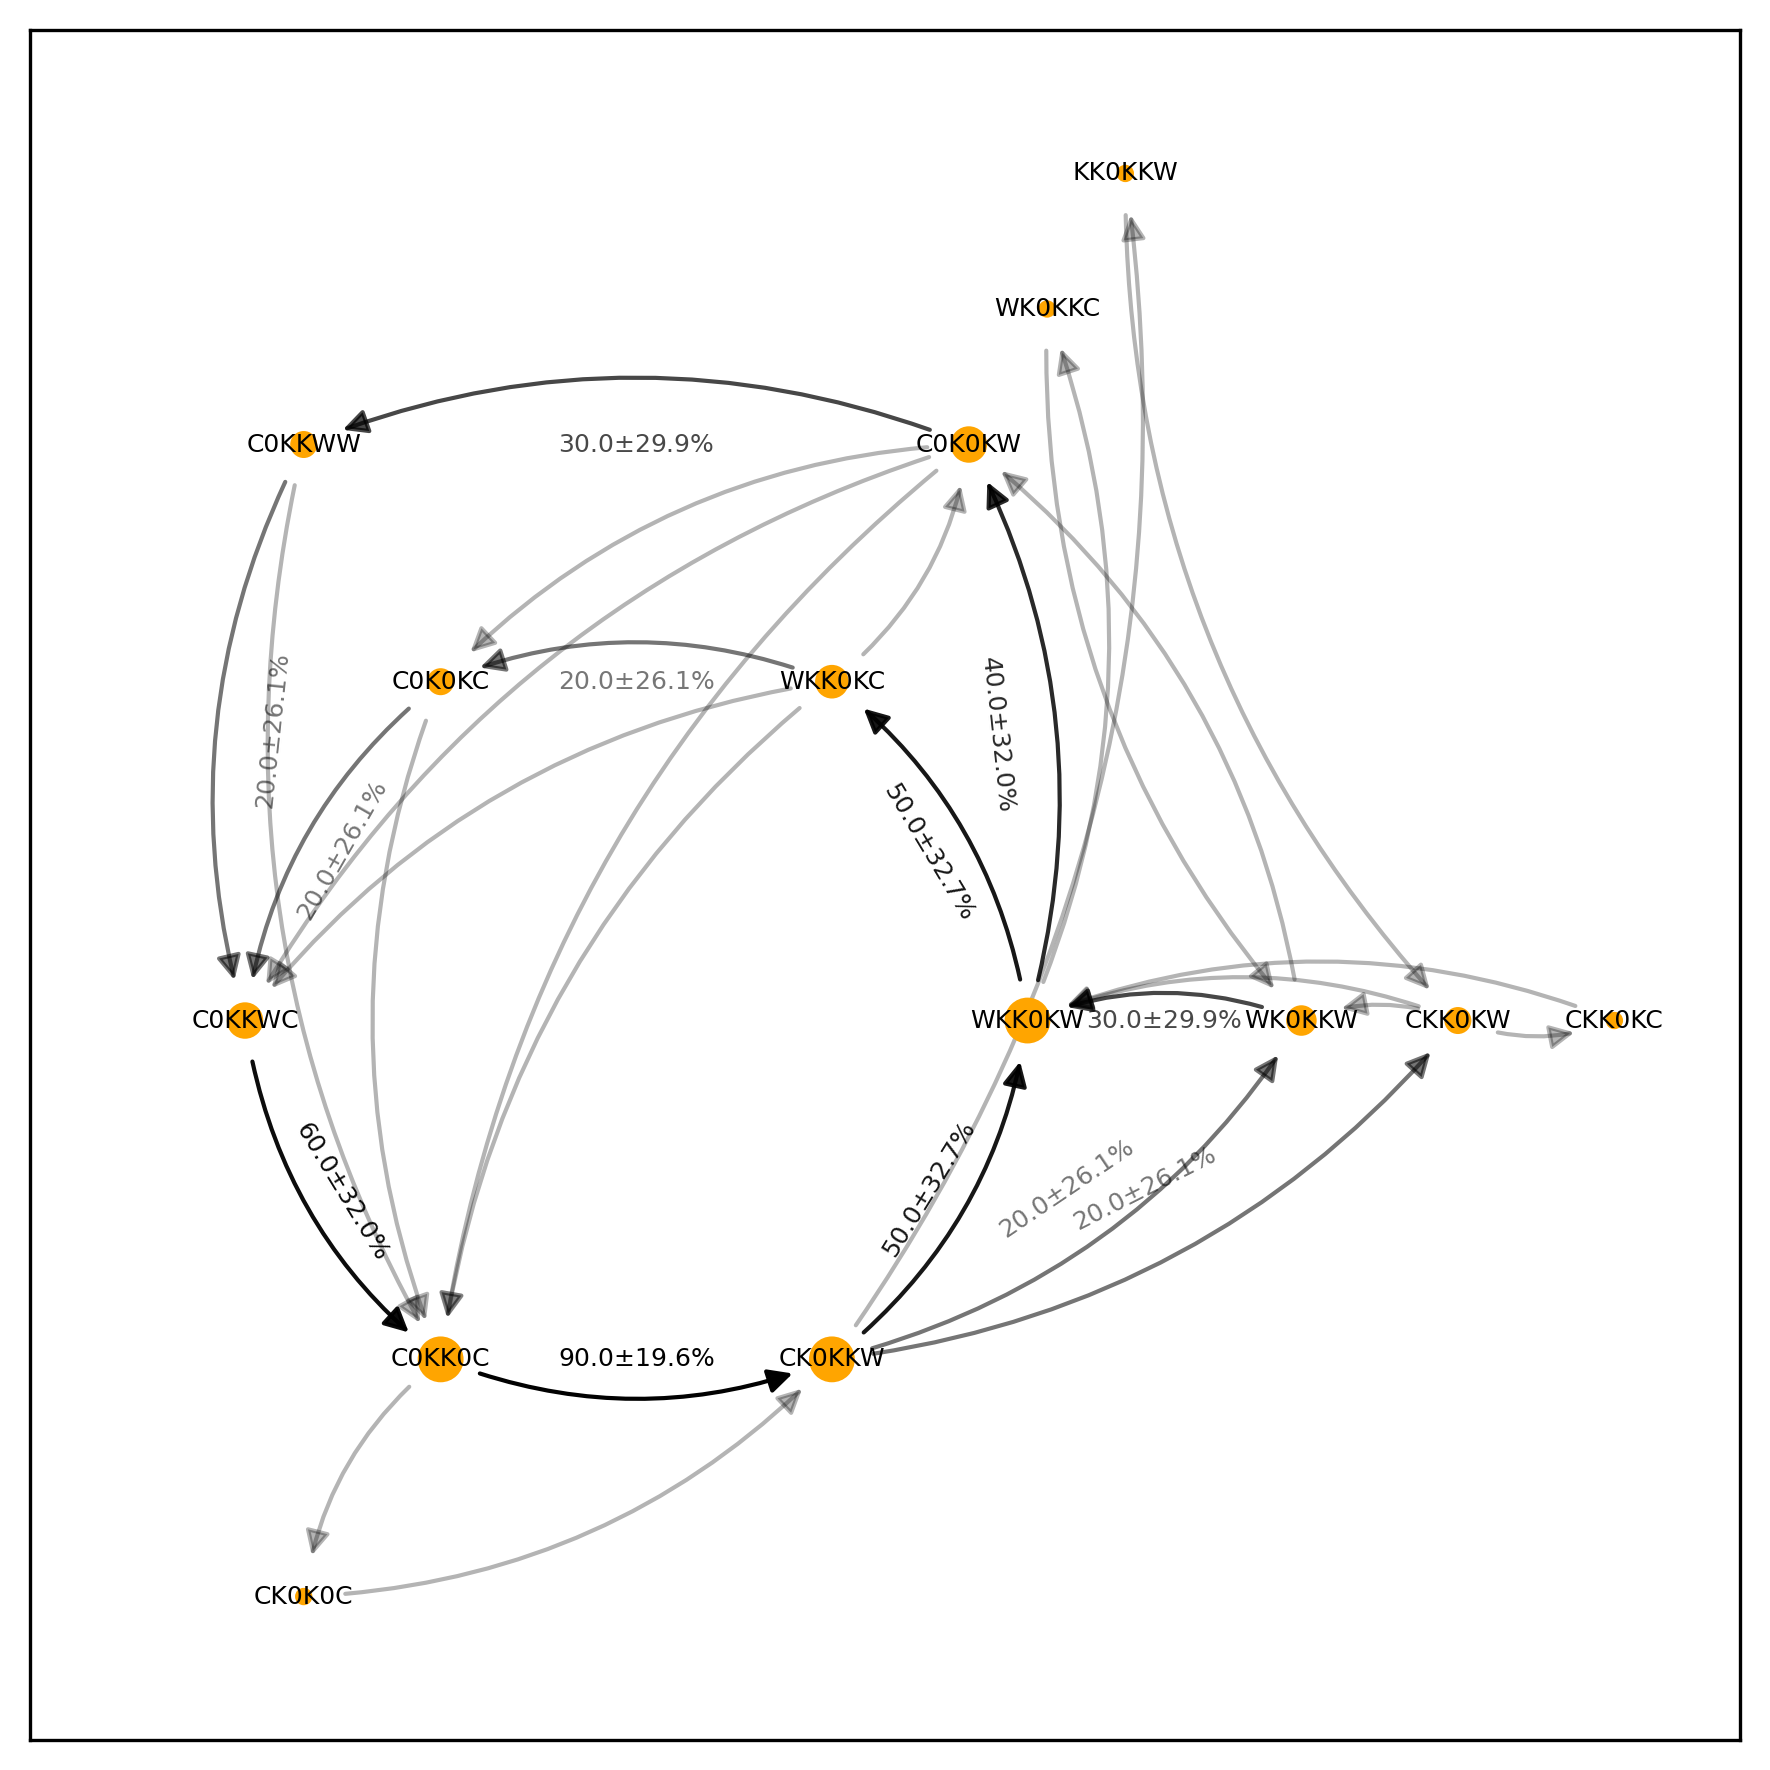

,initial,final,mean (ns),low (ns),high (ns),n,k_f,w_f
0,WKK0KW,WKK0KC,0.331888,0.270361,0.449577,249,0.0,0.0
1,WKK0KC,C0K0KC,1.955152,1.369061,2.733384,33,1.0,0.0
2,C0K0KC,C0KKWC,4.900000,2.004444,10.162852,9,1.0,1.0
3,C0KKWC,C0KK0C,0.181270,0.144762,0.235873,63,0.0,-1.0
4,C0KK0C,CK0KKW,1.869565,1.214783,3.515555,23,2.0,0.0
5,CK0KKW,WKK0KW,1.075294,0.508171,2.103901,17,1.0,0.0


In [5]:
channel.cycles_6_all, _ = kchannel.findCycles(channel.occupancy_6_all, channel.jumps_all, 'WKK0KW', n_bs_jump=4)
cycleProbs_6, mainPath = kchannel.plotCycles(channel.cycles_6_all, state_threshold=.01, 
                                  label_threshold=0.15, offset=0.7, scale=0.4, figsize=(6,6),
                                  returnCycleProb=True, returnMainPath=True)
df = kchannel.permeationMFPT(channel.occupancy_6_all, channel.jumps_all, mainPath, n_bs_jump=4)
df